### PYTHON ASSIGNMENT 

### My client,one of the startup who manufacture shoes approached me. They want to know how they can make their latest model a global success. As a data scientist it is my duty to create a pipeplant to get insights from some datas which include other brand shoes and their sales structure. 

### Importing libraries

In [61]:
import pandas as pd
import numpy as np

### visualization libraries

In [62]:
import seaborn as sns
sns.set(color_codes = True)
import os
import plotly.graph_objs as go
import matplotlib.pyplot as plt

In [63]:
import sklearn.preprocessing

### Loading dataset 

In [64]:
df = pd.read_csv("../../datasets/shoes.csv")
df.head()

,Order Date,Brand,Sneaker Name,Sale Price,Retail Price,Release Date,Shoe Size,Buyer Region
0,9/1/17,Yeezy,Adidas-Yeezy-Boost-350-Low-V2-Beluga,"$1,097",$220,9/24/16,11.0,California
1,9/1/17,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Copper,$685,$220,11/23/16,11.0,California
2,9/1/17,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Green,$690,$220,11/23/16,11.0,California
3,9/1/17,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red,"$1,075",$220,11/23/16,11.5,Kentucky
4,9/1/17,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red-2017,$828,$220,2/11/17,11.0,Rhode Island


In [65]:
df.tail(15)

,Order Date,Brand,Sneaker Name,Sale Price,Retail Price,Release Date,Shoe Size,Buyer Region
99941,2/13/19,Yeezy,adidas-Yeezy-Boost-350-V2-Static-Reflective,$573,$220,12/26/18,8.5,Oregon
99942,2/13/19,Yeezy,adidas-Yeezy-Boost-350-V2-Static-Reflective,$480,$220,12/26/18,12.0,Alabama
99943,2/13/19,Yeezy,adidas-Yeezy-Boost-350-V2-Static-Reflective,$600,$220,12/26/18,5.5,Oregon
99944,2/13/19,Yeezy,adidas-Yeezy-Boost-350-V2-Static-Reflective,$335,$220,12/26/18,14.0,California
99945,2/13/19,Yeezy,adidas-Yeezy-Boost-350-V2-Static-Reflective,$699,$220,12/26/18,11.0,California
99946,2/13/19,Yeezy,adidas-Yeezy-Boost-350-V2-Static-Reflective,$699,$220,12/26/18,11.0,New Jersey
99947,2/13/19,Yeezy,adidas-Yeezy-Boost-350-V2-Static-Reflective,$618,$220,12/26/18,9.5,California
99948,2/13/19,Yeezy,adidas-Yeezy-Boost-350-V2-Static-Reflective,$581,$220,12/26/18,9.0,Oregon
99949,2/13/19,Yeezy,adidas-Yeezy-Boost-350-V2-Static-Reflective,$594,$220,12/26/18,8.5,Oregon
99950,2/13/19,Yeezy,adidas-Yeezy-Boost-350-V2-Static-Reflective,$582,$220,12/26/18,10.0,New Jersey


We have printed head and tail of the dataset.

In [66]:
df.dtypes

Order Date       object
Brand            object
Sneaker Name     object
Sale Price       object
Retail Price     object
Release Date     object
Shoe Size       float64
Buyer Region     object
dtype: object

we have checked the datatype of the dataset.

### Checking for null values

In [67]:
df.isnull().sum()

Order Date      0
Brand           0
Sneaker Name    0
Sale Price      0
Retail Price    0
Release Date    0
Shoe Size       0
Buyer Region    0
dtype: int64

Eventhough there is no null values we will do the function dropna() to remove coloumn with null value.

In [68]:
df.dropna()
df.head()

,Order Date,Brand,Sneaker Name,Sale Price,Retail Price,Release Date,Shoe Size,Buyer Region
0,9/1/17,Yeezy,Adidas-Yeezy-Boost-350-Low-V2-Beluga,"$1,097",$220,9/24/16,11.0,California
1,9/1/17,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Copper,$685,$220,11/23/16,11.0,California
2,9/1/17,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Green,$690,$220,11/23/16,11.0,California
3,9/1/17,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red,"$1,075",$220,11/23/16,11.5,Kentucky
4,9/1/17,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red-2017,$828,$220,2/11/17,11.0,Rhode Island


Printing all the coloumn names

In [69]:
df.columns

Index(['Order Date', 'Brand', 'Sneaker Name', 'Sale Price', 'Retail Price',
       'Release Date', 'Shoe Size', 'Buyer Region'],
      dtype='object')

### removing unwanted coloumn

In [70]:
df = df.drop("Brand",axis = 1)
df.head()

,Order Date,Sneaker Name,Sale Price,Retail Price,Release Date,Shoe Size,Buyer Region
0,9/1/17,Adidas-Yeezy-Boost-350-Low-V2-Beluga,"$1,097",$220,9/24/16,11.0,California
1,9/1/17,Adidas-Yeezy-Boost-350-V2-Core-Black-Copper,$685,$220,11/23/16,11.0,California
2,9/1/17,Adidas-Yeezy-Boost-350-V2-Core-Black-Green,$690,$220,11/23/16,11.0,California
3,9/1/17,Adidas-Yeezy-Boost-350-V2-Core-Black-Red,"$1,075",$220,11/23/16,11.5,Kentucky
4,9/1/17,Adidas-Yeezy-Boost-350-V2-Core-Black-Red-2017,$828,$220,2/11/17,11.0,Rhode Island


Since the brand is not important we have removed it.

In [71]:
df.describe()

,Shoe Size
count,99956.000000
mean,9.344181
std,2.329588
min,3.500000
25%,8.000000
50%,9.500000
75%,11.000000
max,17.000000


We described our dataset.

### Counting how many shoes a model have been sold.

In [16]:
df["Sneaker Name"].value_counts()

adidas-Yeezy-Boost-350-V2-Butter                     11423
Adidas-Yeezy-Boost-350-V2-Beluga-2pt0                10395
Adidas-Yeezy-Boost-350-V2-Zebra                      10110
Adidas-Yeezy-Boost-350-V2-Blue-Tint                   9297
Adidas-Yeezy-Boost-350-V2-Cream-White                 9097
Adidas-Yeezy-Boost-350-V2-Sesame                      5553
adidas-Yeezy-Boost-350-V2-Static                      4983
Adidas-Yeezy-Boost-350-V2-Semi-Frozen-Yellow          4854
Air-Jordan-1-Retro-High-Off-White-University-Blue     4635
adidas-Yeezy-Boost-350-V2-Static-Reflective           3184
Nike-Air-Presto-Off-White-Black-2018                  1884
Nike-Air-Presto-Off-White-White-2018                  1883
Nike-Air-VaporMax-Off-White-2018                      1591
Nike-Blazer-Mid-Off-White-All-Hallows-Eve             1435
Nike-Blazer-Mid-Off-White-Grim-Reaper                 1398
Nike-Zoom-Fly-Off-White-Pink                          1359
Nike-Air-VaporMax-Off-White-Black                     13

adidas-Yeezy-Boost-350-V2-Butter have the highest shoes sold.

### Checking which model have the highest sales price.

In [21]:
df["Sneaker Name"][df["Sale Price"]== max(df["Sale Price"])]

24                Adidas-Yeezy-Boost-350-V2-Core-Black-Red
179           Adidas-Yeezy-Boost-350-Low-Pirate-Black-2016
322                            Nike-Air-VaporMax-Off-White
819                   Adidas-Yeezy-Boost-350-Low-V2-Beluga
4234                             Nike-Air-Presto-Off-White
7209                             Nike-Air-Presto-Off-White
11504             Adidas-Yeezy-Boost-350-V2-Core-Black-Red
15970             Adidas-Yeezy-Boost-350-V2-Core-Black-Red
16576             Adidas-Yeezy-Boost-350-V2-Core-Black-Red
17908                 Adidas-Yeezy-Boost-350-Low-V2-Beluga
18142                  Adidas-Yeezy-Boost-350-Low-Moonrock
25613                            Nike-Air-Max-90-Off-White
26759    Air-Jordan-1-Retro-High-Off-White-University-Blue
26794    Air-Jordan-1-Retro-High-Off-White-University-Blue
26846             Adidas-Yeezy-Boost-350-V2-Core-Black-Red
26976    Air-Jordan-1-Retro-High-Off-White-University-Blue
27118    Air-Jordan-1-Retro-High-Off-White-University-Bl

Nike-Air-Max-97-Off-White-Menta have the highest sales price.

### arranging dataset accoring to release date to know how many models where released in a particular date.

In [24]:
df.sort_values(by = "Release Date", ascending = True).head(10)

,Order Date,Sneaker Name,Sale Price,Retail Price,Release Date,Shoe Size,Buyer Region
77298,12/19/18,Nike-Zoom-Fly-Off-White-Black-Silver,$270,$170,10/13/18,8.5,Illinois
82744,12/29/18,Nike-Zoom-Fly-Off-White-Black-Silver,$310,$170,10/13/18,9.5,Hawaii
82745,12/29/18,Nike-Zoom-Fly-Off-White-Black-Silver,$265,$170,10/13/18,7.0,California
82746,12/29/18,Nike-Zoom-Fly-Off-White-Black-Silver,$330,$170,10/13/18,11.0,Maine
82747,12/29/18,Nike-Zoom-Fly-Off-White-Black-Silver,$333,$170,10/13/18,10.5,Wisconsin
82748,12/29/18,Nike-Zoom-Fly-Off-White-Black-Silver,$315,$170,10/13/18,9.5,Florida
82749,12/29/18,Nike-Zoom-Fly-Off-White-Black-Silver,$325,$170,10/13/18,11.0,Kansas
72178,12/9/18,Nike-Zoom-Fly-Off-White-Black-Silver,$325,$170,10/13/18,10.0,California
72179,12/9/18,Nike-Zoom-Fly-Off-White-Black-Silver,$340,$170,10/13/18,11.0,Virginia
72180,12/9/18,Nike-Zoom-Fly-Off-White-Black-Silver,$308,$170,10/13/18,9.5,Virginia


### finiding which region have the highest sales price.

In [25]:
df["Buyer Region"][df["Sale Price"]== max(df["Sale Price"])]

24            Kentucky
179           Kentucky
322           Maryland
819           Virginia
4234          New York
7209        California
11504       California
15970       California
16576        Tennessee
17908         New York
18142       New Jersey
25613         New York
26759         New York
26794        Louisiana
26846         New York
26976       New Jersey
27118            Texas
27468       New Jersey
27971    New Hampshire
28520       California
28551           Oregon
28621           Oregon
29073       California
29220            Texas
29625          Florida
30456       California
30730         Illinois
31701         Michigan
38351           Oregon
43994         Delaware
44005           Oregon
44188           Oregon
44250         Delaware
44955         Missouri
46907      Connecticut
47545       California
49925         Colorado
55149    Massachusetts
56484       Washington
56885       California
57112    New Hampshire
68828       California
79971         Michigan
80234      

California have shoes with highest sales price.

### printing a particular coloumn which is sales price to get more insight.

In [36]:
df["Sale Price"].head(10)

0    $1,097
1      $685
2      $690
3    $1,075
4      $828
5      $798
6      $784
7      $460
8      $465
9      $465
Name: Sale Price, dtype: object

### Plotting a bar graph to find which model were sold highest.

Text(0.5, 1.0, 'Top 5 models with starting price')

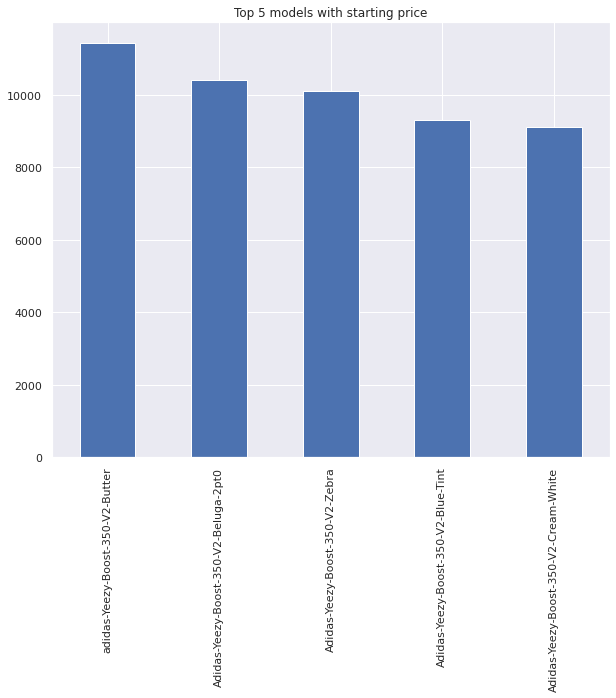

In [40]:
top_5 = df['Sneaker Name'].value_counts()[:5]
top_5.plot(kind='bar',figsize=(10,8))
plt.title('Top 5 models with starting price')

adidas yeezy 350 v2 butter were sold highest.

### Plotting a bar grapgh to find which region have the highest shoe sales.

Text(0.5, 1.0, 'Top 5 regions with higher buying rate')

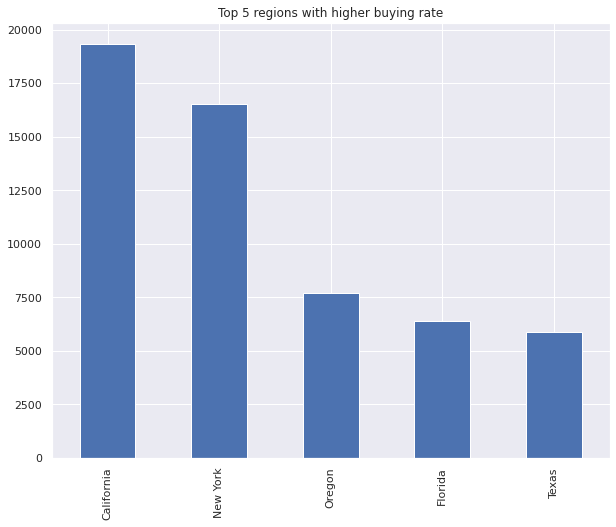

In [43]:
top_5 = df['Buyer Region'].value_counts()[:5]
top_5.plot(kind='bar',figsize=(10,8))
plt.title('Top 5 regions with higher buying rate')

california has the highest buying rate

### Plotting a displot to find which size have the highest sales.

<AxesSubplot:ylabel='Density'>

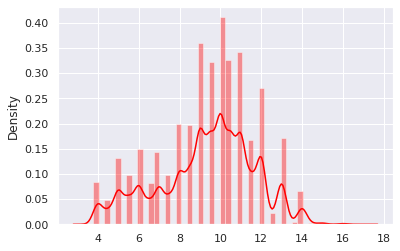

In [49]:


x = df["Shoe Size"].values
sns.distplot(x, color = "red")


shoe size between 10 and 11 have the highest sales.

### Printing release date and order date to understand how long did it took to order a shoe after its manufacture.

In [56]:
df["Release Date"].head(10)

0     9/24/16
1    11/23/16
2    11/23/16
3    11/23/16
4     2/11/17
5     2/11/17
6    12/17/16
7     4/29/17
8     4/29/17
9     4/29/17
Name: Release Date, dtype: object

In [58]:
df["Order Date"].head(10)

0    9/1/17
1    9/1/17
2    9/1/17
3    9/1/17
4    9/1/17
5    9/1/17
6    9/1/17
7    9/1/17
8    9/1/17
9    9/1/17
Name: Order Date, dtype: object

for some shoes it takes around one year to get ordered ater its releasing.

### finding how many shoes were sold on a particular date here 9/1/17.

In [77]:
df[(["Sneaker Name"]) 
& (df["Order Date"] == "9/1/17")]

,Order Date,Sneaker Name,Sale Price,Retail Price,Release Date,Shoe Size,Buyer Region
0,9/1/17,Adidas-Yeezy-Boost-350-Low-V2-Beluga,"$1,097",$220,9/24/16,11.0,California
1,9/1/17,Adidas-Yeezy-Boost-350-V2-Core-Black-Copper,$685,$220,11/23/16,11.0,California
2,9/1/17,Adidas-Yeezy-Boost-350-V2-Core-Black-Green,$690,$220,11/23/16,11.0,California
3,9/1/17,Adidas-Yeezy-Boost-350-V2-Core-Black-Red,"$1,075",$220,11/23/16,11.5,Kentucky
4,9/1/17,Adidas-Yeezy-Boost-350-V2-Core-Black-Red-2017,$828,$220,2/11/17,11.0,Rhode Island
5,9/1/17,Adidas-Yeezy-Boost-350-V2-Core-Black-Red-2017,$798,$220,2/11/17,8.5,Michigan
6,9/1/17,Adidas-Yeezy-Boost-350-V2-Core-Black-White,$784,$220,12/17/16,11.0,California
7,9/1/17,Adidas-Yeezy-Boost-350-V2-Cream-White,$460,$220,4/29/17,10.0,New York
8,9/1/17,Adidas-Yeezy-Boost-350-V2-Cream-White,$465,$220,4/29/17,11.0,Kansas
9,9/1/17,Adidas-Yeezy-Boost-350-V2-Cream-White,$465,$220,4/29/17,11.0,Florida


The list of shoes released on 9/1/17.

### printing shoes with retail price of 220 dollars.

In [78]:
df[(["Sneaker Name"]) 
& (df["Retail Price"] == "$220")]

,Order Date,Sneaker Name,Sale Price,Retail Price,Release Date,Shoe Size,Buyer Region
0,9/1/17,Adidas-Yeezy-Boost-350-Low-V2-Beluga,"$1,097",$220,9/24/16,11.0,California
1,9/1/17,Adidas-Yeezy-Boost-350-V2-Core-Black-Copper,$685,$220,11/23/16,11.0,California
2,9/1/17,Adidas-Yeezy-Boost-350-V2-Core-Black-Green,$690,$220,11/23/16,11.0,California
3,9/1/17,Adidas-Yeezy-Boost-350-V2-Core-Black-Red,"$1,075",$220,11/23/16,11.5,Kentucky
4,9/1/17,Adidas-Yeezy-Boost-350-V2-Core-Black-Red-2017,$828,$220,2/11/17,11.0,Rhode Island
...,...,...,...,...,...,...,...
99951,2/13/19,adidas-Yeezy-Boost-350-V2-Static-Reflective,$565,$220,12/26/18,8.0,Oregon
99952,2/13/19,adidas-Yeezy-Boost-350-V2-Static-Reflective,$598,$220,12/26/18,8.5,California
99953,2/13/19,adidas-Yeezy-Boost-350-V2-Static-Reflective,$605,$220,12/26/18,5.5,New York
99954,2/13/19,adidas-Yeezy-Boost-350-V2-Static-Reflective,$650,$220,12/26/18,11.0,California


Shoes having retail price of $220 has the hoghest number.

It can be seen from the pipeplant that most shoes were sold on the month of September. So my client should release their model on September with atleast retail price of $220 and they should release their model first in Califronia. The model will be global success if these conditions are met.

### Referenece

https://www.kaggle.com/datasets/hudsonstuck/stockx-data-contest -- Dataset